

IMPORTING ALL THE NECESSARY LIBRARIES!!

In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

IMPORTING THE DATASET!!

In [476]:
df=pd.read_csv('loan_prediction.csv')

In [477]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [478]:
print(f"SHAPE OF THE DATASET IS {df.shape}   Contains rows {df.shape[0]} and columns {df.shape[1]}")

SHAPE OF THE DATASET IS (614, 13)   Contains rows 614 and columns 13


CHECKING FOR THE NULLS!!
---------------------

In [479]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

WE CAN CLEARLY OBSERVE THAT <BR>
GENDER<BR>
MARRIED<BR>
DEPENDENTS<BR>
SELF_EMPLOYED<BR>
LoanAmount<br>
Loan_Amount_Term<br>
Credit_History<br>
HAVE SIGNIFICANT NULLS AND WE HAVE TO TREAT THEM USING SUITABLE METHODS!!

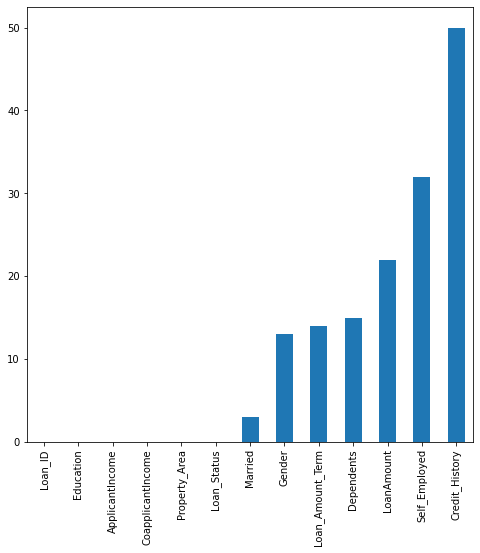

In [480]:
plt.figure(figsize=(8,8))
plt.grid(True)
df.isna().sum().sort_values().plot(kind='bar')
plt.show()

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


AS WE CAN SEE OUR DATASET CONSISTS OF OBJECTS(STRING) AND FLOAT VALUES

DECRIBING THE CONTINUOUS COLUMNS
----------------

In [482]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [483]:
#IT CAN BE OBSERVED THAT CoapplicantIncome minimum value is zero which is not practically possible as its going to reduce the odds of sanctioning of loans drastically as coapplicant income and debt income ratio is key factor in deciding the status of approval
#FURTHER PLOTS WILL HELP US UNDERSTAND THIS DESCRIPTION BETTER

HEATMAP FOR DESCRIBING THE DATA
------------------

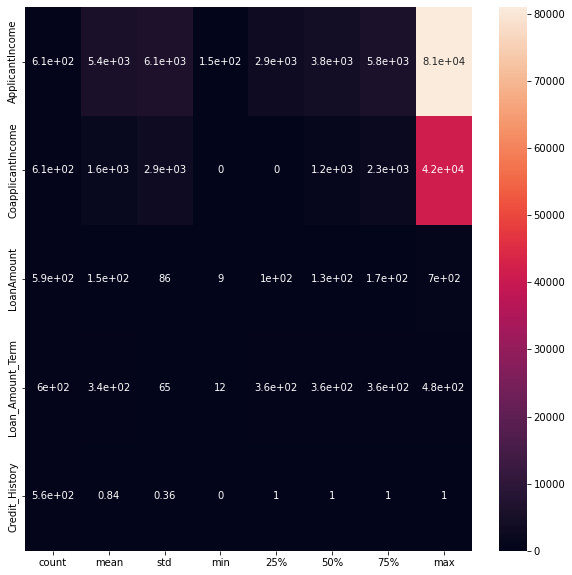

In [484]:
plt.figure(figsize=(10,10))
sns.heatmap(df.describe().T,annot=True,annot_kws={'size':10})
plt.show()

DECRIBING THE CATEGORICAL COLUMNS
----------------

In [485]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [486]:
#AS LOAN_ID COUNT AND UNIQUE NUMBERS ARE ALMOST SAME ITS JUST A SEQUENCE AND MAY NOT INFLUENCE THE PREDICTION SIGNIFICANTLY


LETS UNDERSTAND THE CATEGORICAL DATA MORE EFFICIENTLY USING THE DATAFRAME!!

In [487]:
#making lists of continious an categorical columns
cont_col=[]
cat_col=[]

In [488]:
#USING A FOR LOOP TO ITERATE OVER THE DATASET AND DIVIDE THE DATASET INTO CATEGORICAL AND CONTINUOUS COLUMNS
for i in df:
    if(df[i].dtype=='O'):
        cat_col.append(i)
    else:
        cont_col.append(i)

In [489]:
cont_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [490]:
#INITIALISING EMPTY LISTS TO BE APPENDED AND CONSTITUTE THE DATAFRAME
feat=[]
unique=[]
num=[]

for i in cat_col:
    feat.append(i)
    unique.append(df[i].unique())
    num.append(len(df[i].unique()))

In [491]:
info=pd.DataFrame({'FEATURES':feat,"UNIQUE_FEATURES":unique,"NUMBER OF UNIQUE":num})

In [492]:
info

,FEATURES,UNIQUE_FEATURES,NUMBER OF UNIQUE
0,Loan_ID,"[LP001002, LP001003, LP001005, LP001006, LP001...",614
1,Gender,"[Male, Female, nan]",3
2,Married,"[No, Yes, nan]",3
3,Dependents,"[0, 1, 2, 3+, nan]",5
4,Education,"[Graduate, Not Graduate]",2
5,Self_Employed,"[No, Yes, nan]",3
6,Property_Area,"[Urban, Rural, Semiurban]",3
7,Loan_Status,"[Y, N]",2


In [493]:
# UNIQUE FEATURES WITH THEIR LENGHT CAN BE SEEN ABOVE
#DEPENDENTS, PROPERTY_AREA ARE  ORDINAL COLUMNS AND WE WILL HANDLE THEM SUITABLY WHILE TIME OF ENCODING

CHECKING THE CORRELATION AMONG THE  CONTINUOUS COLUMNS (HEATMAP)
---------------------

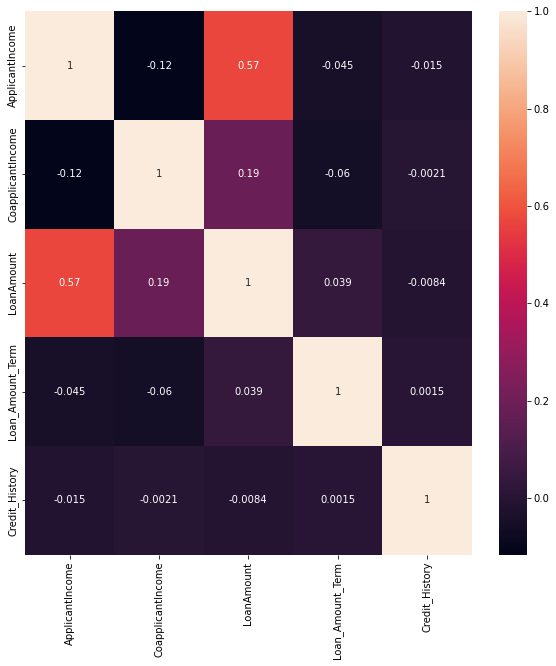

In [494]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [495]:
#IT CAN BE SEEN THAT APPLICANT_INCOME AND LOAN AMOUNT HAVE A HIGH CORRELATION OF 0.57<BR>
#CoapplicantIncome have a significant correlation of 0.19 

HANDLING THE NULLS
-----------------

In [496]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [497]:
df1=df.copy()

In [498]:
#WE WILL CHECK CERTAIN RELATIONS TO IMPUTE OUR NULL VALUES


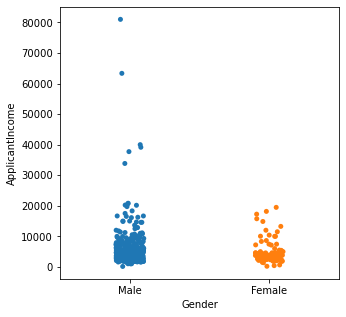

In [499]:
plt.figure(figsize=(5,5))
sns.stripplot(x=df['Gender'],y=df['ApplicantIncome'])
plt.show()

<b>AS IT CAN BE SEEN THAT MALEs ARE HAVING A GREATER SALARY THAN FEMALEs
<b>WE WILL TRY TO IMPUTE THE GENDER USING THE INCOME BY ITERATIVE IMPUTER

In [500]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [501]:
from sklearn.linear_model import LogisticRegression

In [502]:
lr=LogisticRegression()

In [503]:
ii=IterativeImputer(lr)

<b>ENCODING GENDER COLUMN USING MALE-1 AND FEMALE-0

In [504]:
df1['Gender']=df1['Gender'].map({'Male':1,'Female':0})

In [505]:
fg=pd.DataFrame(ii.fit_transform(df1[['ApplicantIncome','Gender']]),columns=['ApplicantIncome','Gender'])

In [506]:
df1['Gender']=fg['Gender']

<b>GENDER NULLS IMPUTED SUCCESSFULLY!!

<b>IMPUTING DEPENDENTS<b/>

<b>AS WE CAN SEE BEING MARRIED AND UN-MARRIED AFFECT OUR DEPENDENTS COUNT TO A GREAT EXTENT WE WILL TRY TO IMPUTE DEPENDENTS USING MARRIED COLUMN<b/>

<b>ENCODING DEPENDENT COLUMN USING MAP FUNCTION

In [507]:
df1['Dependents']=df1['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [508]:
df1['Dependents']=df1['Dependents'].fillna(df1['Dependents'].mode()[0])

<b>ENCODING SELF_EMPLOYED COLUMN

In [509]:
df1['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [510]:
df1['Self_Employed']=df1['Self_Employed'].map({'No':1,'Yes':0})

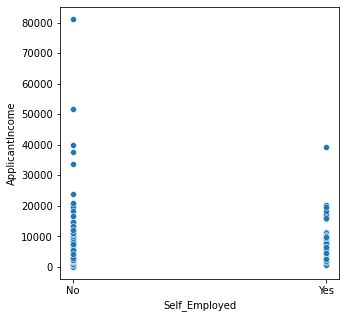

In [511]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['Self_Employed'],y=df['ApplicantIncome'])
plt.show()

<b>IT CAN BE CLEARLY SEEN THAT CLIENTS WHO ARE IN A JOB/NOT_SELF_EMPLOYED ARE HAVING A greater income than the self_employed once<b/><br><br>
<b>so we will use applicantincome to classify whether the person is self_employed or not<b/>

In [512]:
fk=pd.DataFrame(ii.fit_transform(df1[['Self_Employed','ApplicantIncome']]),columns=['Self_Employed','ApplicantIncome'])

In [513]:
fk['Self_Employed']

0      1.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Self_Employed, Length: 614, dtype: float64

In [514]:
df1['Self_Employed']=fk['Self_Employed']

In [515]:
df1['Self_Employed'].isna().sum()

0

<b>SUCCESSFULLY IMPUTED THE SELF EMPLOYED COLUMNS<b/>

<b>ITERATING LOAN_AMOUNT<b/>

AS WE CAN SEE FROM THE HEATMAP LOAN AMOUNT IS SIGNIFICANTLY CORRELATED WITH APPLICANT INCOME AND CONSIDERABLY CORRELATED WITH CO_APPLICANT INCOME WE WILL IMPUTE LOAN AMOUNT USING BOTH OF THESE COLUMNS

In [516]:
from sklearn.linear_model import LinearRegression

In [517]:
lr=LinearRegression()

In [518]:
ik=IterativeImputer(lr)

In [519]:
fs=pd.DataFrame(ik.fit_transform(df1[['ApplicantIncome','CoapplicantIncome','LoanAmount']]),columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'])

In [520]:
print(f"ORIGINAL COLUMN LoanAmount is \n\n\n{df['LoanAmount'].describe()}")

ORIGINAL COLUMN LoanAmount is 


count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


In [521]:
print(f"ITERATIVELY IMPUTED COLUMN LoanAmount is \n\n\n{fs['LoanAmount'].describe()}")

ITERATIVELY IMPUTED COLUMN LoanAmount is 


count    614.000000
mean     146.246697
std       84.286570
min        9.000000
25%      100.250000
50%      128.000000
75%      165.750000
max      700.000000
Name: LoanAmount, dtype: float64


In [522]:
fs['LoanAmount'].isna().sum()

0

AS WE CAN SEE THE MEAN/STD OF the data havent changed much and the count have increased to 614 depicting imputation of the nulls we can proceed with these values

In [523]:
df1['LoanAmount']=fs['LoanAmount']

<b>IMPUTING LOAN_AMOUNT_TERM

In [524]:
df1['Loan_Amount_Term']=df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0])

In [525]:
df1['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<b>IMPUTING Credit_History

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

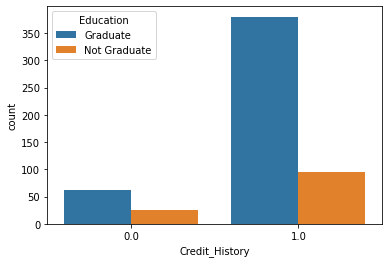

In [526]:
sns.countplot(x=df1['Credit_History'],hue=df1['Education'])

In [527]:
tk=df1[df1.Credit_History.isin([float('nan')])][['Education','Credit_History']]

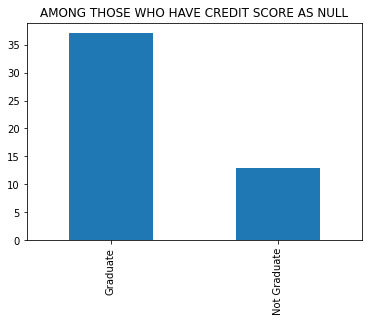

In [528]:
fig=tk['Education'].value_counts().plot(kind='bar')
plt.title("AMONG THOSE WHO HAVE CREDIT SCORE AS NULL")
plt.show()

Among those whose credit_scores are null and those who are graduate are having a count of 37<br>
those who are not graduate and credit_Scores are null have a count of 13<br>

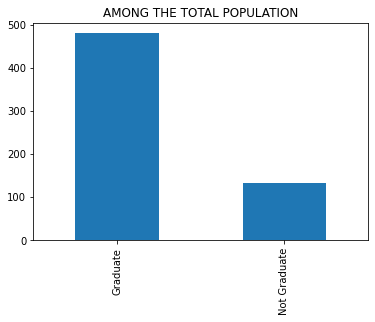

In [529]:
fig=df1['Education'].value_counts().plot(kind='bar')
plt.title("AMONG THE TOTAL POPULATION")
plt.show()

WE CAN INFER FROM THE ABOVE POPULATION THAT GRADUATES HAVE HIGH CHANCES OF CREDIT_HISTORY AND AS THE MAXIMUM AMONG THE NULLS AS THE CREDIT HISTORY ARE GRADUATES WE WILL IMPUTE IT USING MODE 

In [530]:
df1['Credit_History']=df1['Credit_History'].fillna(df1['Credit_History'].mode()[0])

In [531]:
df1['Credit_History'].isna().sum()

0

<b>IMPUTING MARRIED COLUMN<br><br>

SINCE THERE ARE ONLY 3 SUCH ROWS HAVING MARRIED AS NULL WE WILL DROP THOSE ROWS

In [532]:
df1=df1.dropna(subset=['Married'])

In [533]:
df1.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

DATA CLEANING COMPLETE
--------------------

ANALYSIS
-------------------

<B>GENDER

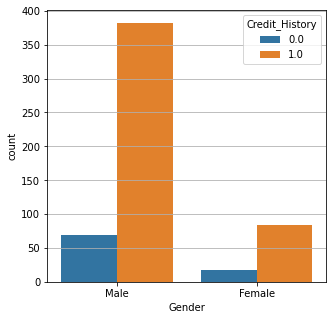

In [534]:
plt.figure(figsize=(5,5))
plt.grid(True)
sns.countplot(df['Gender'],hue=df['Credit_History'])
plt.show()

It can be observed that Males are having a significantly greater count when it comes to apply for a loan<br>
When it comes to credit history males have a greater count than females<br>

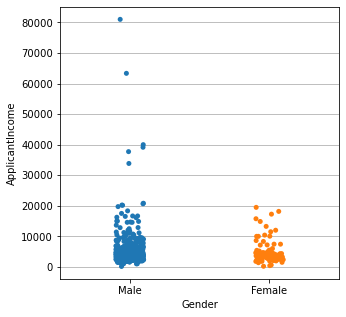

In [535]:
plt.figure(figsize=(5,5))
plt.grid(True)
sns.stripplot(x=df['Gender'],y=df['ApplicantIncome'])
plt.show()

Its quiet easy to depict from the above plot that male applicants have a high ranging salaries when compared to Female applicants<br>

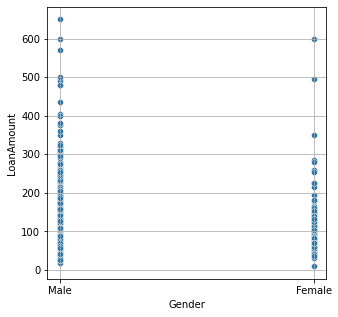

In [536]:
plt.figure(figsize=(5,5))
plt.grid(True)
sns.scatterplot(x=df['Gender'],y=df['LoanAmount'])
plt.show()

Males are showing in good numbers when it comes to sanction a High Loan Amount<br>
Till 200 the distribution is kind of same but as the amount increases males are having strong tendency to show for it<br>

<B>MARRIAGE AS  A FACTOR<B/>

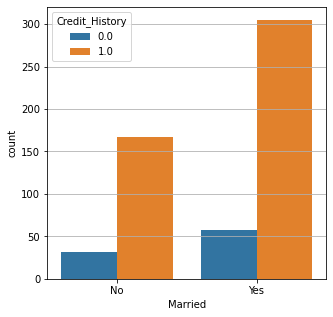

In [537]:
plt.figure(figsize=(5,5))
plt.grid(True)
sns.countplot(df['Married'],hue=df['Credit_History'])
plt.show()

AMONG THE POPULATION THOSE WHO ARE MARRIED ARE MORE LIKELY TO APPLY FOR THE LOAN<BR>
MARRIED APPLICANTS HAVE A HIGHER COUNT IN CREDIT_HISTORY WHEN COMPARED TO SINGLE APPLICANTS<BR>


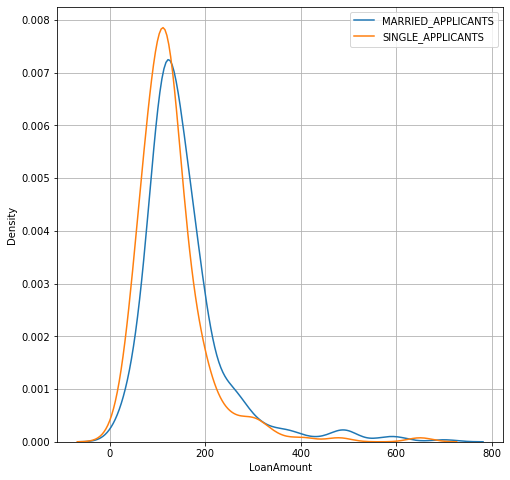

In [538]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.kdeplot(df.loc[df['Married']=='Yes','LoanAmount'],label='MARRIED_APPLICANTS')
sns.kdeplot(df.loc[df['Married']=='No','LoanAmount'],label='SINGLE_APPLICANTS')
plt.legend()
plt.show()

IT CAN BE CLEARLY SEEN THAT MARRIED_APPLICANTS HAVE A SLIGHTLY HIGHER MEAN AS COMPARED TO SINGLE_APPLICANTS<BR>
THOUGH THE DENSITY AROUND THE MEAN IS HIGHER FOR SINGLE APPLICANTS AND SLIGHTLY LOWER FOR MARRIED APPLICANTS<BR?
DISTRIBUTION IS ALMOST SAME IN TERMS OF SKEWNESS AND OUTLIERS

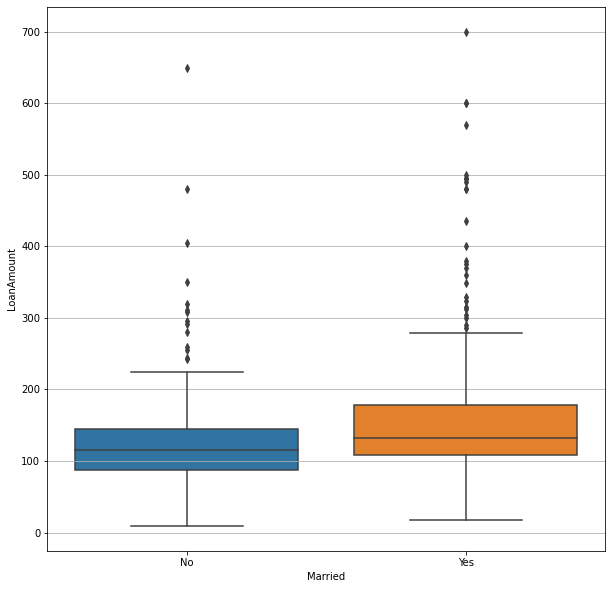

In [539]:
plt.figure(figsize=(10,10))
plt.grid(True)
sns.boxplot(x=df['Married'],y=df['LoanAmount'])
plt.show()

WHEN IT COMES TO OUTLIERS BOTH ARE HAVING ALMOST SAME NUMBERS AND SAME PATTERNS 

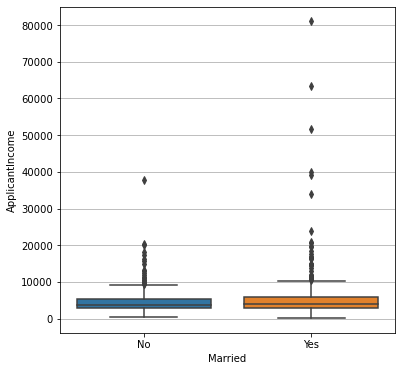

In [540]:
plt.figure(figsize=(6,6))
plt.grid(True)
sns.boxplot(x=df['Married'],y=df['ApplicantIncome'])
plt.show()

IN TERMS OF APPLICANT INCOME THE MARRIED COUPLES HAVE EXCEPTIONALLY HIGH OUTLIERS PRESENT AS COMPARED TO SINGLE APPLICANTS

<B> ROLE OF DEPENDENTS !!

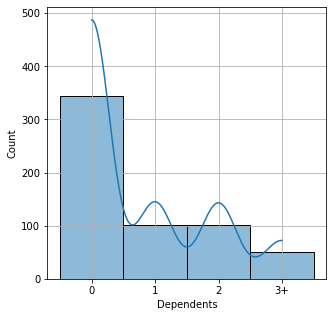

In [541]:
plt.figure(figsize=(5,5))
plt.grid(True)
sns.histplot(df['Dependents'],kde=True)
plt.show()

IT CAN BE CLEARLY OBSERVED FROM THE PLOT THAT COUNT DECRESES AS NUMBER OF DEPENDENTS INCREASES<BR>
THOSE WHO DONT HAVE ANY DEPENDENTS ARE AMONG HIGHEST IN NUMBER IN APPLICATION OF LOANS!!

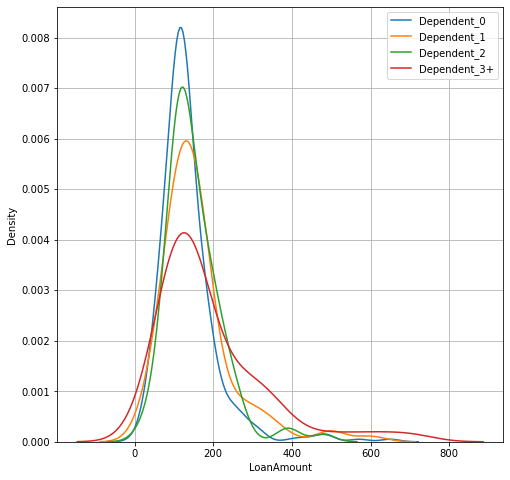

In [542]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.kdeplot(df.loc[df['Dependents']=='0','LoanAmount'],label='Dependent_0')
sns.kdeplot(df.loc[df['Dependents']=='1','LoanAmount'],label='Dependent_1')
sns.kdeplot(df.loc[df['Dependents']=='2','LoanAmount'],label='Dependent_2')
sns.kdeplot(df.loc[df['Dependents']=='3+','LoanAmount'],label='Dependent_3+')
plt.legend()
plt.show()

IT CAN BE OBSERVED THAT AS THE NUMBER OF DEPENDENTS KEEPS ON INCREASING THE SPREAD FROM THE MEAN INCREASES AND DENSITY AROUND THE MEAN DECREASES<BR>


<B>IMPACT OF EDUCATION

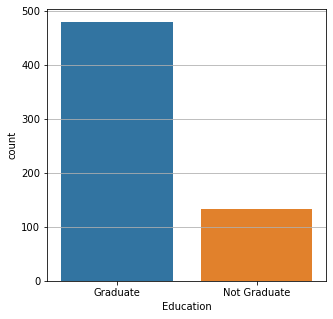

In [543]:
plt.figure(figsize=(5,5))
plt.grid(True)
sns.countplot(df['Education'])
plt.show()

AMONG THE APPLICANTS THE PEOPLE WITH GRADUATION HAVE A AMAZINGLY GREATER COUNT AS COMPARED TO PEOPLE WITH NO GRADUATION

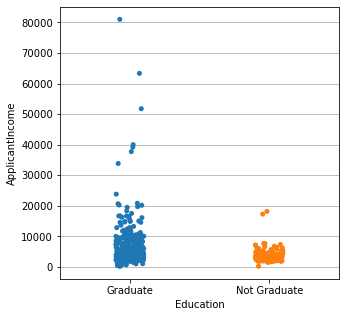

In [544]:
plt.figure(figsize=(5,5))
plt.grid(True)
sns.stripplot(x=df['Education'],y=df['ApplicantIncome'])
plt.show()

THE INCOME OF THOSE HAVING A GRADUTAION IS EXCEPTIONALLY HIGHER THAN THE NON GRADUATES!!


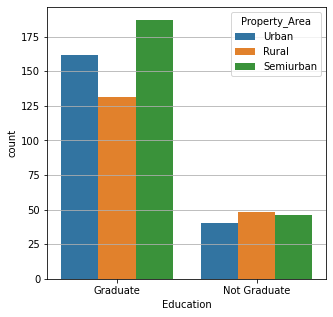

In [545]:
plt.figure(figsize=(5,5))
plt.grid(True)
sns.countplot(x=df['Education'],hue=df['Property_Area'])
plt.show()

MOST APPLICANTS WHO ARE GRADUATE LIVES IN SemiUrban areas followed by Urban AREAS<BR>
NON GRADUATES ARE  MORE CENTRED IN RURAL AREAS<BR>

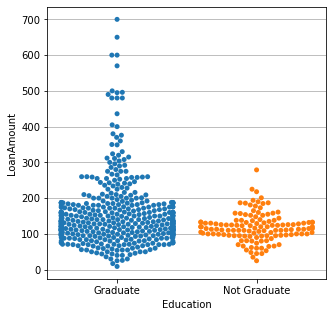

In [546]:
plt.figure(figsize=(5,5))
plt.grid(True)
sns.swarmplot(x=df['Education'],y=df['LoanAmount'])
plt.show()

HAVING GRADUATION AS A QUALIFICATION EFFECTS THE LOAN AMOUNT TOO!<BR>
THOSE HAVING GRADUATE DEGREE TENDS TO TAKE HIGHER SUMS AS LOANS THAN THOSE OF NON GRADUATES

<B>TYPE OF EMPLOYMENT INTERFENCE WITH OTHER FETAURES

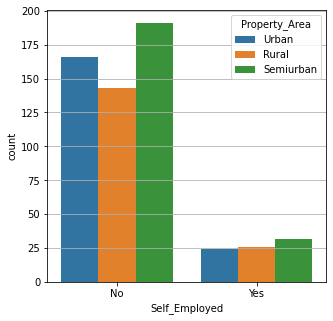

In [547]:
plt.figure(figsize=(5,5))
plt.grid(True)
sns.countplot(x=df['Self_Employed'],hue=df['Property_Area'])
plt.show()

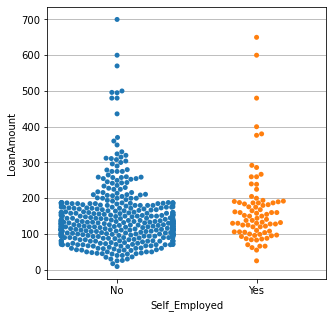

In [548]:
plt.figure(figsize=(5,5))
plt.grid(True)
sns.swarmplot(x=df['Self_Employed'],y=df['LoanAmount'])
plt.show()

IT QUIET NOTICABLE THAT PEOPLE WHO ARE IN A JOB TENDS TO TAKE HIGH LOAN AMOUNTS AS COMPARED TO THOSE WHO ARE SELF EMPLOYED<BR>

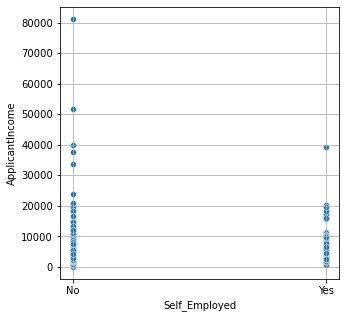

In [549]:
plt.figure(figsize=(5,5))
plt.grid(True)
sns.scatterplot(x=df['Self_Employed'],y=df['ApplicantIncome'])
plt.show()

Those who are in a job makes more money as compared to those are self employed!!

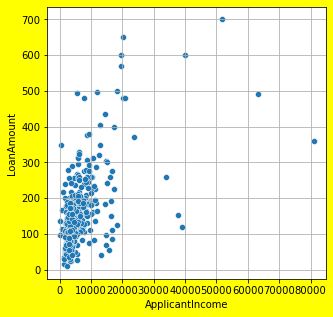

In [550]:
plt.figure(figsize=(5,5),facecolor='Yellow')
plt.grid(True)
sns.scatterplot(x=df['ApplicantIncome'],y=df['LoanAmount'])
plt.show()

A LINEAR RELATION CAN BE SEEN BETWEEN THE APPLICANT INCOME AND LOAN AMOUNT  BUT ONLY OVER THE LOW INCOMES <BR>


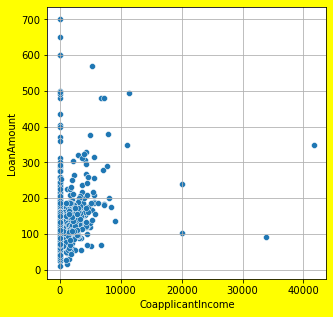

In [551]:
plt.figure(figsize=(5,5),facecolor='Yellow')
plt.grid(True)
sns.scatterplot(x=df['CoapplicantIncome'],y=df['LoanAmount'])
plt.show()

Coapplicant income too influence the LoanAmount sanctioned though the realtionship does not seem that strong as ApplicantIncome<br?


<b>Trends in Loan_Amount_Term 

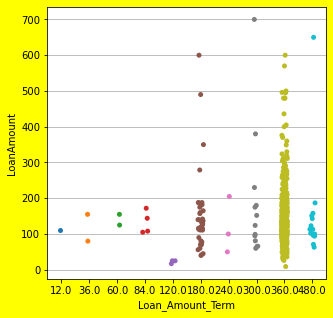

In [552]:
plt.figure(figsize=(5,5),facecolor='Yellow')
plt.grid(True)
sns.stripplot(x=df['Loan_Amount_Term'],y=df['LoanAmount'])
plt.show()

IT CAN BE CLEARLY OBSERVED THAT HIGHER LOAN_AMOUNT_TERM indicates Higher Loan Amount<br>


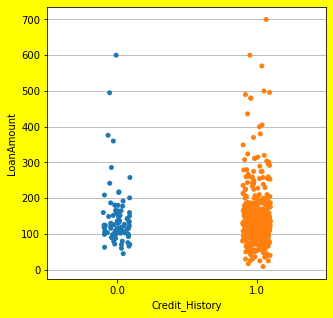

In [553]:
plt.figure(figsize=(5,5),facecolor='Yellow')
plt.grid(True)
sns.stripplot(x=df['Credit_History'],y=df['LoanAmount'])
plt.show()

IT DEPICTS THAT TO SANCTION HIGHER LOAN AMOUNTS ONE MUST HAVE CREDIT_HISTORY <BR>
CREDIT_HISTORY HELPS THE BANKS TO DECIDE WHETHER OR NOT THE APPLICANT IS CAPABLE OF REPAYING THE LOAN BASED ON HIS LAST PERFORMANCES<BR>


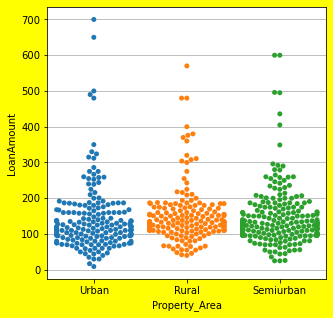

In [554]:
plt.figure(figsize=(5,5),facecolor='Yellow')
plt.grid(True)
sns.swarmplot(x=df['Property_Area'],y=df['LoanAmount'])
plt.show()

UPTO A SUM OF 200 all have almost same distribution when it come to loan amount<br>
Higher LoanAmount sanctioning becomes smooth if the property_Area is urban followed by SemiUrban then Rural<br>

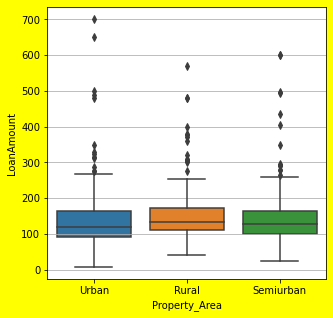

In [555]:
plt.figure(figsize=(5,5),facecolor='Yellow')
plt.grid(True)
sns.boxplot(x=df['Property_Area'],y=df['LoanAmount'])
plt.show()

Exceptionally high outlers present in Urban areas followed by SemiUrban and tat last Rural

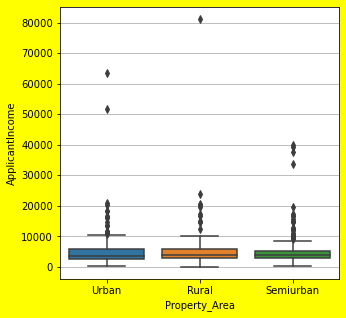

In [556]:
plt.figure(figsize=(5,5),facecolor='Yellow')
plt.grid(True)
sns.boxplot(x=df['Property_Area'],y=df['ApplicantIncome'])
plt.show()

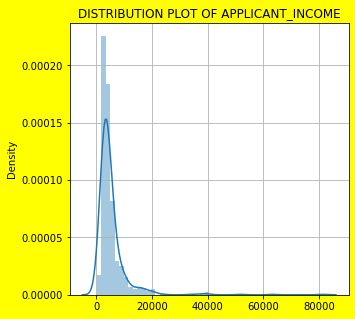

In [557]:
plt.figure(figsize=(5,5),facecolor='Yellow')
plt.grid(True)
sns.distplot(x=df['ApplicantIncome'])
plt.title("DISTRIBUTION PLOT OF APPLICANT_INCOME")
plt.show()

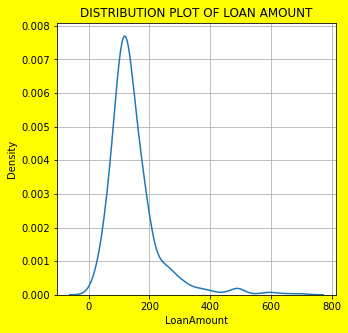

In [558]:
plt.figure(figsize=(5,5),facecolor='Yellow')
plt.grid(True)
sns.kdeplot(x=df['LoanAmount'])
plt.title("DISTRIBUTION PLOT OF LOAN AMOUNT")
plt.show()

HIGH SKEWNESS CAN BE OBSERVED AND SIGNIFICANT OUTLIERS IN THE LOAN AMOUNT DISTRIBUTION

DROPPING LOAN_ID AS ITS ONLY A SEQUENCE AND ADD NO VALUE TO THE PREDICTION

In [559]:
df1.drop(['Loan_ID'],axis=1,inplace=True)

In [560]:
#MAPPING COLUMNS['MARRIED',;EDUCATION,'Loan_Status']

In [561]:
df1['Married']=df1['Married'].map({'Yes':1,'No':0})
df1['Education']=df1['Education'].map({'Graduate':1,'Not Graduate':0})
df1['Loan_Status']=df1['Loan_Status'].map({'Y':1,'N':0})

<b>ORDIANLLY ENCODING PROPERTY_AREA

In [562]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['Urban','Semiurban','Rural']])
df1['Property_Area']=oe.fit_transform(df1['Property_Area'].values.reshape(-1,1))

HANDLING OUTLIERS!!
-----------------

In [563]:
print(f'SHAPE BEFORE OUTLIER REMOVAL IS {df1.shape}')

SHAPE BEFORE OUTLIER REMOVAL IS (611, 12)


In [564]:
from scipy.stats import zscore

In [565]:
z=np.abs(zscore(df1))

In [566]:
df1=df1[(z<3).all(axis=1)]

In [567]:
print(f'SHAPE AFTER OUTLIER REMOVAL IS {df1.shape}')

SHAPE AFTER OUTLIER REMOVAL IS (574, 12)


In [568]:
print(f'PERCENT LOSS AFTER OUTLIER REMOVAL IS {round((611-574)/611*100,2)}')

PERCENT LOSS AFTER OUTLIER REMOVAL IS 6.06


SINCE THE LOSS IS LESS THAN 10% WE CAN CONSIDER CONTINUING WITH THESE OUTLIER REMOVAL DATASET

Checking the  THE SKEWNWSS NUMERICALLY!!!
---------------------

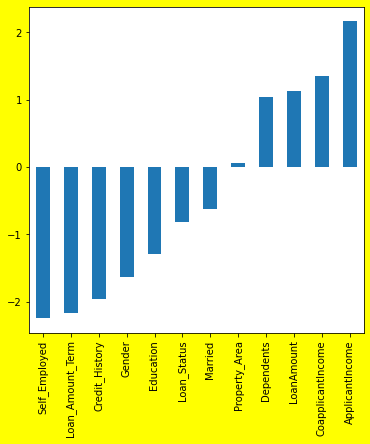

In [569]:
plt.figure(figsize=(6,6),facecolor='Yellow')
df1.skew().sort_values().plot(kind='bar')
plt.show()

WE CAN CONTROLL THE SKEWNESS OF THESE FEATURES by using POWERTRANSFORMER

In [570]:
from sklearn.preprocessing import PowerTransformer

In [571]:
pt=PowerTransformer()


<B> SPLIITING DATA INTO FEATURES AND LABEL

In [576]:
x=df1.drop(['Loan_Status'],axis=1)
y=df1['Loan_Status']

In [577]:
x_scaled=pd.DataFrame(pt.fit_transform(x),columns=x.columns)

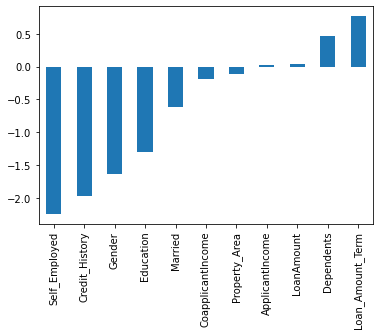

In [578]:
x_scaled.skew().sort_values().plot(kind='bar')
plt.show()

<B>CONSIDERBALE REDUCE IN THE SKEWNESS CAN BE SEEN FROM THE POWERTRANSFORMER!!


In [579]:
y.value_counts()

1    395
0    179
Name: Loan_Status, dtype: int64

<B>THE LABEL SEEMS BALANCED SO NEED TO USE SMOTE TO BALANCE THE DATASET

<B>CHECKING FOR THE VARIANCE INFLATION FACTOR(MULTI-COLLINEARITY)
----------------

In [582]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [583]:
vif=pd.DataFrame()

In [584]:
vif['FEATURES']=x_scaled.columns

In [585]:
vif['scores']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]

In [586]:
vif

,FEATURES,scores
0,Gender,1.224511
1,Married,1.448258
2,Dependents,1.187486
3,Education,1.063468
4,Self_Employed,1.055925
5,ApplicantIncome,1.809477
6,CoapplicantIncome,1.587557
7,LoanAmount,1.591972
8,Loan_Amount_Term,1.049948
9,Credit_History,1.008426


<B>IT CAN BE CLEARLY OBSERVED THAT NONE OF THE SCORES ARE EXCEEDING THE CRITICAL VALUE 5!! SO ITS CONFIRM THAT THERE IS NO MULTI-COLLINEARITY ISSURE PRESENT IN THE DATA

MODEL 1) LOGISTIC REGRESSION
-----------------

<B> IMPORTING NECESSARY LIBRARIES

In [587]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.metrics import plot_roc_curve,roc_auc_score,roc_curve

USING FOR LOOP TO ITERATE WITH DIFFERENT RANDOM_STATES AND SELECTING THE RANDOM STATE WITH HIGH TRAINING AND TESTING ACCURACY

In [588]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=accuracy_score(y_train,lr_train_pred)
    lr_test_accuracy=accuracy_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}  --AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 8


TRAINING ACCURACY IS -81.7  --AND TESTING ACCURACY IS 81.74


AT RANDOM STATE-- 20


TRAINING ACCURACY IS -81.7  --AND TESTING ACCURACY IS 81.74


AT RANDOM STATE-- 29


TRAINING ACCURACY IS -81.7  --AND TESTING ACCURACY IS 81.74


AT RANDOM STATE-- 31


TRAINING ACCURACY IS -81.7  --AND TESTING ACCURACY IS 81.74


AT RANDOM STATE-- 36


TRAINING ACCURACY IS -81.7  --AND TESTING ACCURACY IS 81.74


AT RANDOM STATE-- 42


TRAINING ACCURACY IS -81.7  --AND TESTING ACCURACY IS 81.74


AT RANDOM STATE-- 43


TRAINING ACCURACY IS -81.7  --AND TESTING ACCURACY IS 81.74


AT RANDOM STATE-- 46


TRAINING ACCURACY IS -81.7  --AND TESTING ACCURACY IS 81.74


AT RANDOM STATE-- 53


TRAINING ACCURACY IS -81.7  --AND TESTING ACCURACY IS 81.74


AT RANDOM STATE-- 65


TRAINING ACCURACY IS -81.7  --AND TESTING ACCURACY IS 81.74


AT RANDOM STATE-- 67


TRAINING ACCURACY IS -81.7  --AND TESTING ACCURACY IS 81.74


AT RANDOM STATE-- 69


TRAINING ACCURACY IS -81.7  --AND TESTING

SINCE ITS GIVING almost SAME VALUE for all random states we can take any taking random state as 269

In [589]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=269)

In [590]:
def score(mod,x_train,x_test,y_train,y_test,train):
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=accuracy_score(y_train,y_pred)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCONFUSION MATRIX FOR THE TRAINIG')
        print('\n\n',confusion_matrix(y_train,y_pred))
        print('\n\nCLASSIFICATION REPORT for training --')
        print('\n\n',classification_report(y_train,y_pred))
        
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=accuracy_score(y_test,y_pred)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCONFUSION MATRIX FOR THE TESTING')
        print('\n\n',confusion_matrix(y_test,y_pred))
        print('\n\nCLASSIFICATION REPORT for testing --')
        print('\n\n',classification_report(y_test,y_pred))

In [592]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LogisticRegression() is 81.7


CONFUSION MATRIX FOR THE TRAINIG


 [[ 58  79]
 [  5 317]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.92      0.42      0.58       137
           1       0.80      0.98      0.88       322

    accuracy                           0.82       459
   macro avg       0.86      0.70      0.73       459
weighted avg       0.84      0.82      0.79       459



Testing SCORE FOR THE LogisticRegression() is 81.74


CONFUSION MATRIX FOR THE TESTING


 [[22 20]
 [ 1 72]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.96      0.52      0.68        42
           1       0.78      0.99      0.87        73

    accuracy                           0.82       115
   macro avg       0.87      0.76      0.77       115
weighted avg       0.85      0.82      0.80       115



CHECKING THE CROSS-VAL SCORES FOR THE LOGISTIC REGRESSION

In [593]:
test_pred=lr.predict(x_test)
lr_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
for i in range(2,11):
    cross_val=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print('\nAT CV =',i)
    print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
    print("\nTEST ACCURACY SCORE IS ",lr_test_accuracy)      
    print('-------------')


AT CV = 2

CROSS VAL SCORE IS  81.53

TEST ACCURACY SCORE IS  81.74
-------------

AT CV = 3

CROSS VAL SCORE IS  81.53

TEST ACCURACY SCORE IS  81.74
-------------

AT CV = 4

CROSS VAL SCORE IS  81.02

TEST ACCURACY SCORE IS  81.74
-------------

AT CV = 5

CROSS VAL SCORE IS  81.89

TEST ACCURACY SCORE IS  81.74
-------------

AT CV = 6

CROSS VAL SCORE IS  81.89

TEST ACCURACY SCORE IS  81.74
-------------

AT CV = 7

CROSS VAL SCORE IS  81.71

TEST ACCURACY SCORE IS  81.74
-------------

AT CV = 8

CROSS VAL SCORE IS  81.72

TEST ACCURACY SCORE IS  81.74
-------------

AT CV = 9

CROSS VAL SCORE IS  81.72

TEST ACCURACY SCORE IS  81.74
-------------

AT CV = 10

CROSS VAL SCORE IS  81.72

TEST ACCURACY SCORE IS  81.74
-------------


SINCE CV=5 GAVE CLSOER VALUES TO TEH TEST ACCURACY SCORES WE WILL CONTINUE WITH THESE THIS CV

In [594]:
from sklearn.model_selection import GridSearchCV

HYPER-PARAMETER TUNING
------------

In [595]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [596]:
C = np.logspace(-5, 5, 50)
penalty = ['l1', 'l2']

In [597]:
params={'C':C,'penalty':penalty}

In [598]:
gsc=GridSearchCV(lr,param_grid=params)

In [599]:
gsc.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e-02, 4.71486636e-0...
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [600]:
gsc.best_params_

{'C': 0.19306977288832497, 'penalty': 'l2'}

In [601]:
lr=LogisticRegression()

In [603]:
lr=gsc.best_estimator_

In [604]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LogisticRegression(C=0.19306977288832497) is 81.7


CONFUSION MATRIX FOR THE TRAINIG


 [[ 58  79]
 [  5 317]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.92      0.42      0.58       137
           1       0.80      0.98      0.88       322

    accuracy                           0.82       459
   macro avg       0.86      0.70      0.73       459
weighted avg       0.84      0.82      0.79       459



Testing SCORE FOR THE LogisticRegression(C=0.19306977288832497) is 81.74


CONFUSION MATRIX FOR THE TESTING


 [[22 20]
 [ 1 72]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.96      0.52      0.68        42
           1       0.78      0.99      0.87        73

    accuracy                           0.82       115
   macro avg       0.87      0.76      0.77       115
weighted avg       0.85      0.82      0.80     

SINCE VALUES ARE EXCATLY SAME EVEN AFTER TUNING WE WILL CONTINUE WITH THE DEFAULT PARAMETERS AS THE FINAL!!


In [605]:
test_pred=lr.predict(x_test)
lr_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)

cross_val=cross_val_score(lr,x_scaled,y,cv=5).mean()

In [608]:
print(f'\nAt random state 269 and CV :5')
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",lr_test_accuracy)


At random state 269 and CV :5

CROSS VAL SCORE IS  81.89

TEST ACCURACY SCORE IS  81.74


LOW DIFFERENCE BETWEEN THE TEST AND CROSS VAL SCORE CAN BE OBSERVED DEPICTING THIS AS GOOD MODEL!!


MODEL 2)---DECISION TREE MODELING
----------------------

In [609]:
from sklearn.tree import DecisionTreeClassifier

In [610]:
dt=DecisionTreeClassifier(random_state=269)

In [611]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=269)

In [612]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier(random_state=269) is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[137   0]
 [  0 322]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       322

    accuracy                           1.00       459
   macro avg       1.00      1.00      1.00       459
weighted avg       1.00      1.00      1.00       459



Testing SCORE FOR THE DecisionTreeClassifier(random_state=269) is 73.04


CONFUSION MATRIX FOR THE TESTING


 [[22 20]
 [11 62]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.67      0.52      0.59        42
           1       0.76      0.85      0.80        73

    accuracy                           0.73       115
   macro avg       0.71      0.69      0.69       115
weighted avg       0.72      0.73      0.72      

Hyper Parameter tuning
---------------------

In [613]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [614]:
para={'criterion':['gini','entropy','log_loss'],
      'max_depth':np.arange(20,30),
      'min_samples_split':np.arange(4,7),
      'min_samples_leaf':np.arange(6,10)}

In [615]:
dgsc=GridSearchCV(dt,param_grid=para,cv=5)

In [616]:
dgsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=269),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_leaf': array([6, 7, 8, 9]),
                         'min_samples_split': array([4, 5, 6])})

In [617]:
dgsc.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 9,
 'min_samples_split': 4}

In [618]:
dt=dgsc.best_estimator_

In [619]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=9,
                       min_samples_split=4, random_state=269) is 83.01


CONFUSION MATRIX FOR THE TRAINIG


 [[ 95  42]
 [ 36 286]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.73      0.69      0.71       137
           1       0.87      0.89      0.88       322

    accuracy                           0.83       459
   macro avg       0.80      0.79      0.79       459
weighted avg       0.83      0.83      0.83       459



Testing SCORE FOR THE DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=9,
                       min_samples_split=4, random_state=269) is 73.91


CONFUSION MATRIX FOR THE TESTING


 [[25 17]
 [13 60]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.66      0.60      0.62        42
           1  

In [621]:
test_pred=dt.predict(x_test)
dt_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(dt,x_scaled,y,cv=5).mean()

In [622]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",dt_test_accuracy)


CROSS VAL SCORE IS  76.65

TEST ACCURACY SCORE IS  73.91


THE TRAINING ACCURACY WHICH WAS 100% CAME DOWN CLOSER TO TESTING AND CROSS VAL SCORES DEFINING A GOOD FIT OF THE MODEL!!


MODEL 3)---RANDOM FOREST CLASSIFIER
-----

In [623]:
from sklearn.ensemble import RandomForestClassifier

In [624]:
rfc=RandomForestClassifier()

In [625]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [626]:
rfc_train_pred=rfc.predict(x_train)
rfc_test_pred=rfc.predict(x_test)

In [627]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier() is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[137   0]
 [  0 322]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       322

    accuracy                           1.00       459
   macro avg       1.00      1.00      1.00       459
weighted avg       1.00      1.00      1.00       459



Testing SCORE FOR THE RandomForestClassifier() is 80.87


CONFUSION MATRIX FOR THE TESTING


 [[23 19]
 [ 3 70]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.88      0.55      0.68        42
           1       0.79      0.96      0.86        73

    accuracy                           0.81       115
   macro avg       0.84      0.75      0.77       115
weighted avg       0.82      0.81      0.80       115



HYPER PARAMETER TUNING FOR RANDOM FOREST CLASSIFIER -------
-------------------

In [628]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [632]:
rfc=RandomForestClassifier()

In [633]:
parma={"n_estimators":[50,55,58,62,68],
      "criterion":["gini", "entropy", "log_loss"],
       "min_samples_split":np.arange(2,5),
       "random_state":[165,230,610],
       "min_samples_leaf":np.arange(3,6)
       }

In [634]:
rgsc=GridSearchCV(rfc,param_grid=parma)

In [635]:
rgsc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': [50, 55, 58, 62, 68],
                         'random_state': [165, 230, 610]})

In [638]:
rgsc.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 68,
 'random_state': 230}

In [639]:
rfc=rgsc.best_estimator_

In [640]:
score(rfc,x_train,x_test,y_train,y_test,train=True)
score(rfc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestClassifier(min_samples_leaf=3, n_estimators=68, random_state=230) is 85.62


CONFUSION MATRIX FOR THE TRAINIG


 [[ 76  61]
 [  5 317]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.94      0.55      0.70       137
           1       0.84      0.98      0.91       322

    accuracy                           0.86       459
   macro avg       0.89      0.77      0.80       459
weighted avg       0.87      0.86      0.84       459



Testing SCORE FOR THE RandomForestClassifier(min_samples_leaf=3, n_estimators=68, random_state=230) is 80.87


CONFUSION MATRIX FOR THE TESTING


 [[22 20]
 [ 2 71]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.92      0.52      0.67        42
           1       0.78      0.97      0.87        73

    accuracy                           0.81       115
   macro avg       0.85      

In [641]:
test_pred=rfc.predict(x_test)
rfc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(rfc,x_scaled,y,cv=5).mean()

In [642]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",rfc_test_accuracy)


CROSS VAL SCORE IS  81.54

TEST ACCURACY SCORE IS  80.87


CLOSE VALUES FOR TRAINING TESTING AND CROSS VAL DEPICTS A GOOD MODEL <BR>
ALSO THE PRECISION,RECALL SCORES ARE BETTER 

MODEL 4)-BAGGING CLASSIFIER
---------------------------------------------------------

In [643]:
from sklearn.ensemble import BaggingClassifier

In [644]:
bc=BaggingClassifier()

In [645]:
score(bc,x_train,x_test,y_train,y_test,train=True)
score(bc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier() is 98.69


CONFUSION MATRIX FOR THE TRAINIG


 [[134   3]
 [  3 319]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.98      0.98      0.98       137
           1       0.99      0.99      0.99       322

    accuracy                           0.99       459
   macro avg       0.98      0.98      0.98       459
weighted avg       0.99      0.99      0.99       459



Testing SCORE FOR THE BaggingClassifier() is 79.13


CONFUSION MATRIX FOR THE TESTING


 [[28 14]
 [10 63]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.74      0.67      0.70        42
           1       0.82      0.86      0.84        73

    accuracy                           0.79       115
   macro avg       0.78      0.76      0.77       115
weighted avg       0.79      0.79      0.79       115



HYPER PARAMETER TUNING FOR BAGGING CLASSIFIER
-----------------

In [646]:
bc=BaggingClassifier()

In [647]:
par={"n_estimators":np.arange(50,60),
    "oob_score":[True,False],
    "random_state":[200,220,275,300,375,350,325],
    }

In [649]:
bcgs=GridSearchCV(bc,param_grid=par)

In [650]:
bcgs.fit(x_train,y_train)

GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'oob_score': [True, False],
                         'random_state': [200, 220, 275, 300, 375, 350, 325]})

In [651]:
bcgs.best_params_

{'n_estimators': 52, 'oob_score': True, 'random_state': 375}

In [659]:
bc=bcgs.best_estimator_

In [660]:
score(bc,x_train,x_test,y_train,y_test,train=True)
score(bc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE BaggingClassifier(n_estimators=52, oob_score=True, random_state=375) is 100.0


CONFUSION MATRIX FOR THE TRAINIG


 [[137   0]
 [  0 322]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       322

    accuracy                           1.00       459
   macro avg       1.00      1.00      1.00       459
weighted avg       1.00      1.00      1.00       459



Testing SCORE FOR THE BaggingClassifier(n_estimators=52, oob_score=True, random_state=375) is 79.13


CONFUSION MATRIX FOR THE TESTING


 [[23 19]
 [ 5 68]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.82      0.55      0.66        42
           1       0.78      0.93      0.85        73

    accuracy                           0.79       115
   macro avg       0.80      0.74      0.75    

In [661]:
test_pred=bc.predict(x_test)
bc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(bc,x_scaled,y,cv=5).mean()

In [662]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",bc_test_accuracy)


CROSS VAL SCORE IS  78.57

TEST ACCURACY SCORE IS  79.13


MODEL 5)----KNN
-----------------------------

In [663]:
from sklearn.neighbors import KNeighborsClassifier

In [664]:
knn=KNeighborsClassifier()

In [665]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [666]:
score(knn,x_train,x_test,y_train,y_test,train=True)
score(knn,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsClassifier() is 83.22


CONFUSION MATRIX FOR THE TRAINIG


 [[ 69  68]
 [  9 313]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.88      0.50      0.64       137
           1       0.82      0.97      0.89       322

    accuracy                           0.83       459
   macro avg       0.85      0.74      0.77       459
weighted avg       0.84      0.83      0.82       459



Testing SCORE FOR THE KNeighborsClassifier() is 77.39


CONFUSION MATRIX FOR THE TESTING


 [[23 19]
 [ 7 66]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.77      0.55      0.64        42
           1       0.78      0.90      0.84        73

    accuracy                           0.77       115
   macro avg       0.77      0.73      0.74       115
weighted avg       0.77      0.77      0.76       115



HYPER PARAMETER TUNING THE PARAMETERS
----------------------------

In [685]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [686]:
knn=KNeighborsClassifier()

In [687]:
pop={"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors':np.arange(2,5),
    'leaf_size':[10,18,25,28,30,32,35,38,40,50]}

In [688]:
kgsc=GridSearchCV(knn,param_grid=pop)

In [689]:
kgsc.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 18, 25, 28, 30, 32, 35, 38, 40, 50],
                         'n_neighbors': array([2, 3, 4])})

In [690]:
kgsc.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3}

In [691]:
knn=kgsc.best_estimator_

In [692]:
score(knn,x_train,x_test,y_train,y_test,train=True)
score(knn,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsClassifier(leaf_size=10, n_neighbors=3) is 85.84


CONFUSION MATRIX FOR THE TRAINIG


 [[ 84  53]
 [ 12 310]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.88      0.61      0.72       137
           1       0.85      0.96      0.91       322

    accuracy                           0.86       459
   macro avg       0.86      0.79      0.81       459
weighted avg       0.86      0.86      0.85       459



Testing SCORE FOR THE KNeighborsClassifier(leaf_size=10, n_neighbors=3) is 76.52


CONFUSION MATRIX FOR THE TESTING


 [[24 18]
 [ 9 64]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.73      0.57      0.64        42
           1       0.78      0.88      0.83        73

    accuracy                           0.77       115
   macro avg       0.75      0.72      0.73       115
weighted avg       0.76      0.

In [693]:
test_pred=knn.predict(x_test)
knn_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(knn,x_scaled,y,cv=5).mean()

In [694]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",knn_test_accuracy)


CROSS VAL SCORE IS  75.08

TEST ACCURACY SCORE IS  76.52


MODEL 6)-----SVC-----------
-----------------------

In [695]:
from sklearn.svm import SVC

In [696]:
svc=SVC()

In [697]:
svc.fit(x_train,y_train)

SVC()

In [698]:
score(svc,x_train,x_test,y_train,y_test,train=True)
score(svc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVC() is 83.66


CONFUSION MATRIX FOR THE TRAINIG


 [[ 67  70]
 [  5 317]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.93      0.49      0.64       137
           1       0.82      0.98      0.89       322

    accuracy                           0.84       459
   macro avg       0.87      0.74      0.77       459
weighted avg       0.85      0.84      0.82       459



Testing SCORE FOR THE SVC() is 81.74


CONFUSION MATRIX FOR THE TESTING


 [[23 19]
 [ 2 71]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.92      0.55      0.69        42
           1       0.79      0.97      0.87        73

    accuracy                           0.82       115
   macro avg       0.85      0.76      0.78       115
weighted avg       0.84      0.82      0.80       115



In [699]:
test_pred=svc.predict(x_test)
svc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(svc,x_scaled,y,cv=5).mean()

In [700]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",svc_test_accuracy)


CROSS VAL SCORE IS  81.88

TEST ACCURACY SCORE IS  81.74


HIGH TESTING AND TRAINING VALUES FOR THIS MODEL!!<BR>
DIFFERENCE BETWEEN THE CROSS VAL,TEST ACCURACY SCORE AND TRAINING SCORE IS THE LOWEST<BR>
RELATIVELY LOW FALSE POSITIVES AND NEGATIVES<BR>

MODEL 7) ADABOOST CLASSIFIER-
----------------------

In [701]:
from sklearn.ensemble import AdaBoostClassifier

In [702]:
adc=AdaBoostClassifier()

In [703]:
adc.fit(x_train,y_train)

AdaBoostClassifier()

In [704]:
score(adc,x_train,x_test,y_train,y_test,train=True)
score(adc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostClassifier() is 85.84


CONFUSION MATRIX FOR THE TRAINIG


 [[ 79  58]
 [  7 315]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.92      0.58      0.71       137
           1       0.84      0.98      0.91       322

    accuracy                           0.86       459
   macro avg       0.88      0.78      0.81       459
weighted avg       0.87      0.86      0.85       459



Testing SCORE FOR THE AdaBoostClassifier() is 77.39


CONFUSION MATRIX FOR THE TESTING


 [[20 22]
 [ 4 69]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.83      0.48      0.61        42
           1       0.76      0.95      0.84        73

    accuracy                           0.77       115
   macro avg       0.80      0.71      0.72       115
weighted avg       0.79      0.77      0.76       115



------HYPER PARAMETER TUNING FOR ADABOOST CLASSIFIER-----------------
---------------

In [705]:
adc.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [709]:
adc=AdaBoostClassifier()

In [710]:
param={"algorithm":['SAMME', 'SAMME.R'],
      'n_estimators':np.arange(60,70),
      'random_state':[121,234,345,389,567]}


In [711]:
adgs=GridSearchCV(adc,param_grid=param)

In [712]:
adgs.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69]),
                         'random_state': [121, 234, 345, 389, 567]})

In [714]:
adgs.best_params_

{'algorithm': 'SAMME', 'n_estimators': 60, 'random_state': 121}

In [715]:
adc=adgs.best_estimator_

In [716]:
score(adc,x_train,x_test,y_train,y_test,train=True)
score(adc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostClassifier(algorithm='SAMME', n_estimators=60, random_state=121) is 82.14


CONFUSION MATRIX FOR THE TRAINIG


 [[ 61  76]
 [  6 316]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.91      0.45      0.60       137
           1       0.81      0.98      0.89       322

    accuracy                           0.82       459
   macro avg       0.86      0.71      0.74       459
weighted avg       0.84      0.82      0.80       459



Testing SCORE FOR THE AdaBoostClassifier(algorithm='SAMME', n_estimators=60, random_state=121) is 80.0


CONFUSION MATRIX FOR THE TESTING


 [[22 20]
 [ 3 70]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.88      0.52      0.66        42
           1       0.78      0.96      0.86        73

    accuracy                           0.80       115
   macro avg       0.83      0.74      0

TETSING ACCURACY SCORE INCREASED SIGNIFICANTLY FROM 77.39 TO 80.0 <BR>


In [717]:
test_pred=adc.predict(x_test)
adc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(adc,x_scaled,y,cv=5).mean()

In [718]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print("\nTEST ACCURACY SCORE IS ",adc_test_accuracy)


CROSS VAL SCORE IS  81.19

TEST ACCURACY SCORE IS  80.0


SINCE THE DIFFERENCE BETWEEN THE VALUES OF CROSS VAL AND TEST ACCURACY ARE CLOSE WE WILL CONTINUW WITH THESE PARAMETERS AS FINAL ONES

------------PLOTTING ROC CURVES FOR BOTH TESTING AND TRAINIG------------
---

In [719]:
from sklearn.metrics import plot_roc_curve

ROC CURVE FOR TRAINING

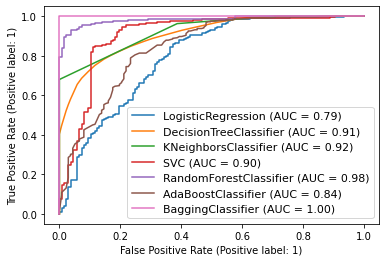

In [720]:
disp=plot_roc_curve(lr,x_train,y_train)
plot_roc_curve(dt,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(adc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(bc,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

ROC CURVE FOR TESTING

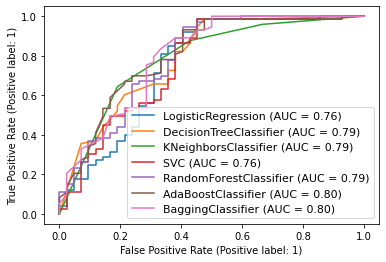

In [721]:
disp=plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(adc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(bc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

CONCLUSION-<BR>
 -----------
<B>SINCE FOR ***ADABOOST CLASSIFIER***<B/> THE DIFFERENCE BETWEEN AUC SCORES FOR THE TRAINING AND TESTING IS AMONG TTHE LOWEST(0.04) AND THE DIFFERENCE BETWEEN THE CROSS VAL SCORE AND THE ACCURACY SCORE IS THE LOWEST WE WILL CHOOSE "ADABOOST CLASSIFIER " AS OUR FINAL MODEL <BR>
Precision and and accuracy scores are also good with comparatively low false positives as compared to other models 


In [722]:
score(adc,x_train,x_test,y_train,y_test,train=True)
score(adc,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostClassifier(algorithm='SAMME', n_estimators=60, random_state=121) is 82.14


CONFUSION MATRIX FOR THE TRAINIG


 [[ 61  76]
 [  6 316]]


CLASSIFICATION REPORT for training --


               precision    recall  f1-score   support

           0       0.91      0.45      0.60       137
           1       0.81      0.98      0.89       322

    accuracy                           0.82       459
   macro avg       0.86      0.71      0.74       459
weighted avg       0.84      0.82      0.80       459



Testing SCORE FOR THE AdaBoostClassifier(algorithm='SAMME', n_estimators=60, random_state=121) is 80.0


CONFUSION MATRIX FOR THE TESTING


 [[22 20]
 [ 3 70]]


CLASSIFICATION REPORT for testing --


               precision    recall  f1-score   support

           0       0.88      0.52      0.66        42
           1       0.78      0.96      0.86        73

    accuracy                           0.80       115
   macro avg       0.83      0.74      0

In [725]:
test_pred=rfc.predict(x_test)
train_pred=rfc.predict(x_train)
rfc_train_accuracy=round(accuracy_score(y_train,train_pred)*100,2)
rfc_test_accuracy=round(accuracy_score(y_test,test_pred)*100,2)
cross_val=cross_val_score(rfc,x_scaled,y,cv=5).mean()

In [727]:
print('\nCROSS VAL SCORE IS ',round(cross_val*100,2))
print(f'\nTRAINING ACCURACY SCORE IS {rfc_train_accuracy}')
print("\nTEST ACCURACY SCORE IS ",rfc_test_accuracy)


CROSS VAL SCORE IS  81.54

TRAINING ACCURACY SCORE IS 85.62

TEST ACCURACY SCORE IS  80.87


SAVING THE MODEL
------------------

In [729]:
import pickle

In [730]:
with open('loan_adc_model','wb') as files:
    pickle.dump(adc,files)